### Соревнование на Kaggle "Предсказание степени загрезненности воды"

Score (Kaggle) - 0.83836

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib as mpl
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Загружаем данные

In [2]:
train = pd.read_csv('Train.csv', delimiter = ',', index_col = 'idx')
train.head(3)

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
idx,,,,,,,,,,,,,,,,,
11,EEA_3161-03-3,2009,2009-04--2009-10,FRGR0220,France,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [3]:
test = pd.read_csv('Test.csv', delimiter = ',', index_col = 'idx')
test.head(3)

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
idx,,,,,,,,,,,,,,,,,
19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
46,EEA_31615-01-7,2009,2009-01--2009-12,FRGR0004B,France,71176346.0,2.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
94,EEA_3161-02-2,2007,2007-01--2007-12,UKSC023165,United Kingdom,25867961.0,0.0,0.0,16.7,2.2,3.5,28.2,18.9,20.2,0.0,2.7,27.25


In [4]:
target = pd.read_csv('Target.csv', delimiter = ',', index_col = 'idx')
target.head(3)

,polution_clf
idx,
11,0
20,0
27,0


In [5]:
submission = pd.read_csv("Submission.csv")
submission

,idx,polution_clf
0,19,0
1,46,0
2,94,0
3,96,0
4,98,0
...,...,...
727,19780,0
728,19824,0
729,19856,0
730,19882,0


In [6]:
df = pd.concat([train, test])

In [7]:
df = df.join(target, on='idx')

In [8]:
df

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution_clf
idx,,,,,,,,,,,,,,,,,,
11,EEA_3161-03-3,2009,2009-04--2009-10,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.0
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.0
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.0
28,EEA_3161-05-5,2009,2009-01--2009-12,FRDR174,France,71176346.0,3.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,1.0
33,EEA_3161-03-3,2009,2009-01--2009-12,FRGR0173,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19780,EEA_31615-01-7,2010,2010-01--2010-12,ES020MSPF000000395,Spain,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,NaN
19824,EEA_3161-02-2,2009,2009-01--2009-12,FRFR289B,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,NaN
19856,EEA_3161-01-1,2009,2009-01--2009-12,FRDR2007E,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,NaN


### Разведывательный анализ данных

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 11 to 19915
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   code             3660 non-null   object 
 1   year             3660 non-null   int64  
 2   period           3660 non-null   object 
 3   id               3660 non-null   object 
 4   Country          3660 non-null   object 
 5   tourists         3660 non-null   float64
 6   venue            3660 non-null   float64
 7   rate             3660 non-null   float64
 8   food             3660 non-null   float64
 9   glass            3660 non-null   float64
 10  metal            3660 non-null   float64
 11  other            3660 non-null   float64
 12  paper            3660 non-null   float64
 13  plastic          3660 non-null   float64
 14  leather          3660 non-null   float64
 15  green_waste      3660 non-null   float64
 16  waste_recycling  3660 non-null   float64
 17  polution_clf

Пропущенных и нулевых значений нет

In [10]:
df.describe()

,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution_clf
count,3660.000000,3.660000e+03,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,2928.000000
mean,2008.656831,5.569954e+07,0.090984,11.070253,31.853109,8.529104,3.086691,24.146068,19.697694,10.506295,0.094820,0.833948,23.062085,0.505123
std,0.937363,2.304268e+07,0.561277,28.400648,8.886749,2.974285,0.883262,6.262395,4.261491,4.215245,0.582198,2.556819,4.803606,0.500059
min,2005.000000,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.000000
25%,2008.000000,5.094169e+07,0.000000,0.000000,32.000000,8.000000,3.000000,26.000000,18.900000,9.000000,0.000000,0.000000,22.260000,0.000000
50%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.000000
75%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.000000
max,2017.000000,7.117635e+07,7.000000,87.158924,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,4.000000,19.180000,47.830000,1.000000


#### Числовые и категориальные признаки

In [11]:
cat_column = ["code", "period", "id", "Country"]
num_column = ["year", "tourists", "venue", "rate", "food", "glass", "metal", "other", "paper", "plastic", "leather", "green_waste", "waste_recycling", "polution_clf"]

### Анализ числовых признаков

In [12]:
df_num = df[num_column]

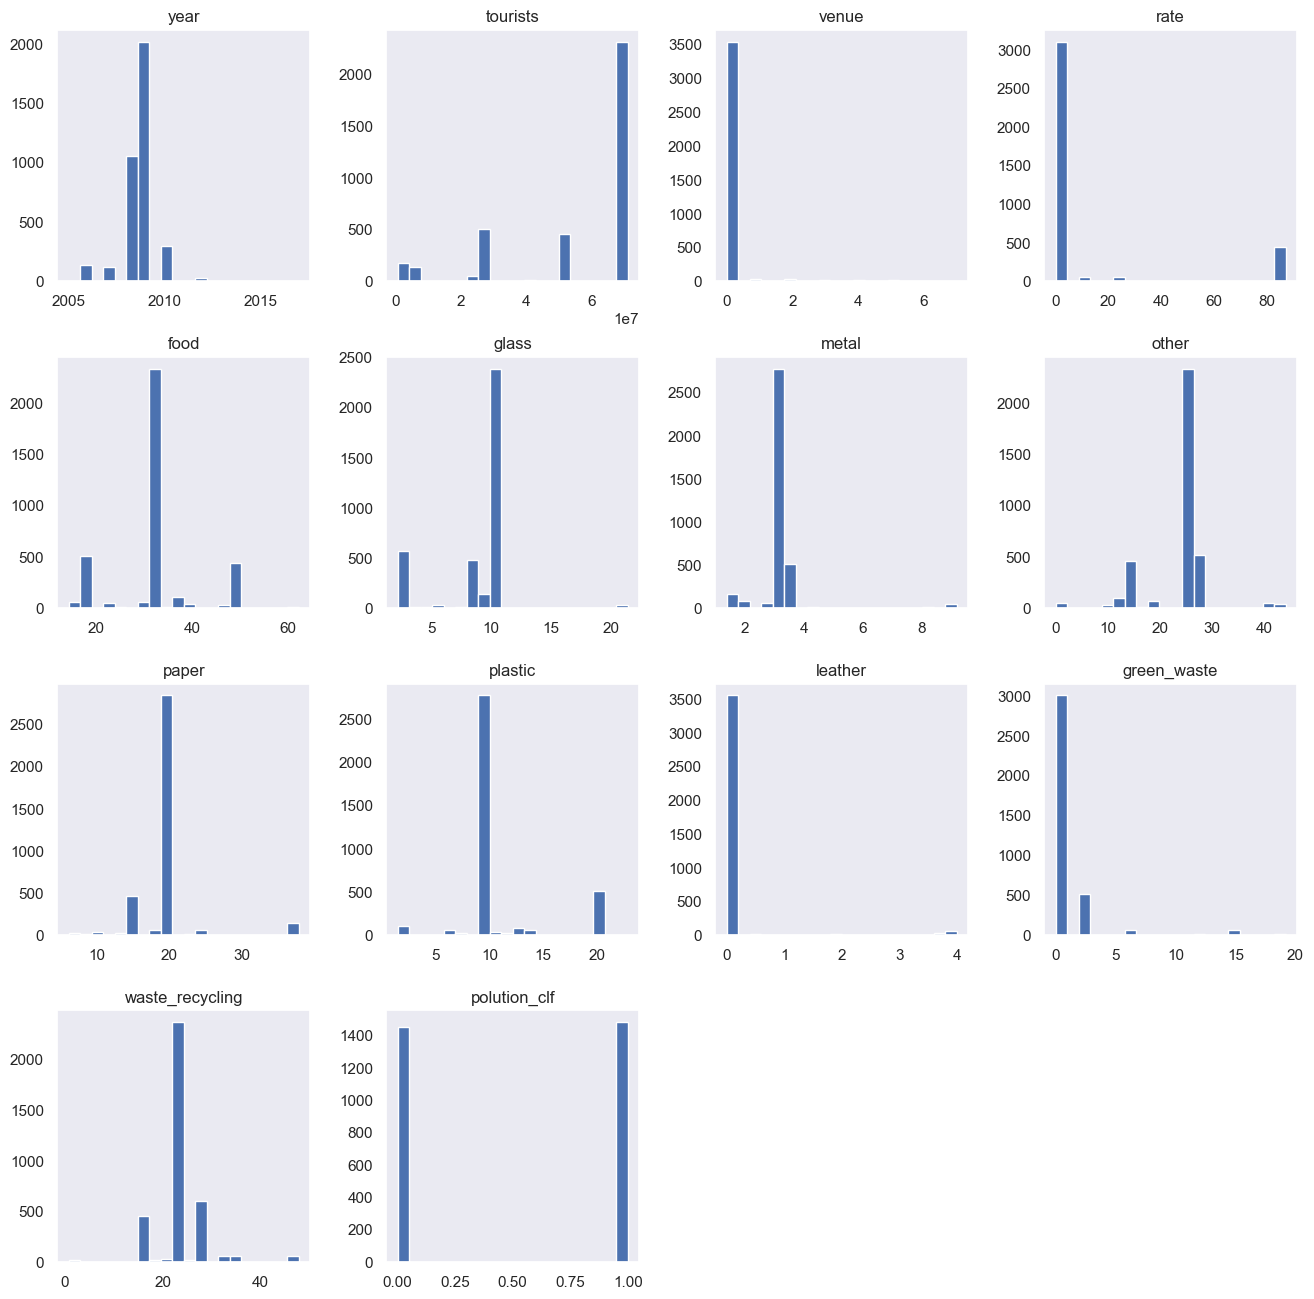

In [13]:
df_num.hist(figsize=(16, 16), bins=20, grid=False);

Видно, что столбец polution_clf (таргет) равномерно разбит между двумя классами, где 0 - незагрезненно, 1 - загрезненно 

### Рассмотрим корреляцию между числовыми признаками

<Axes: >

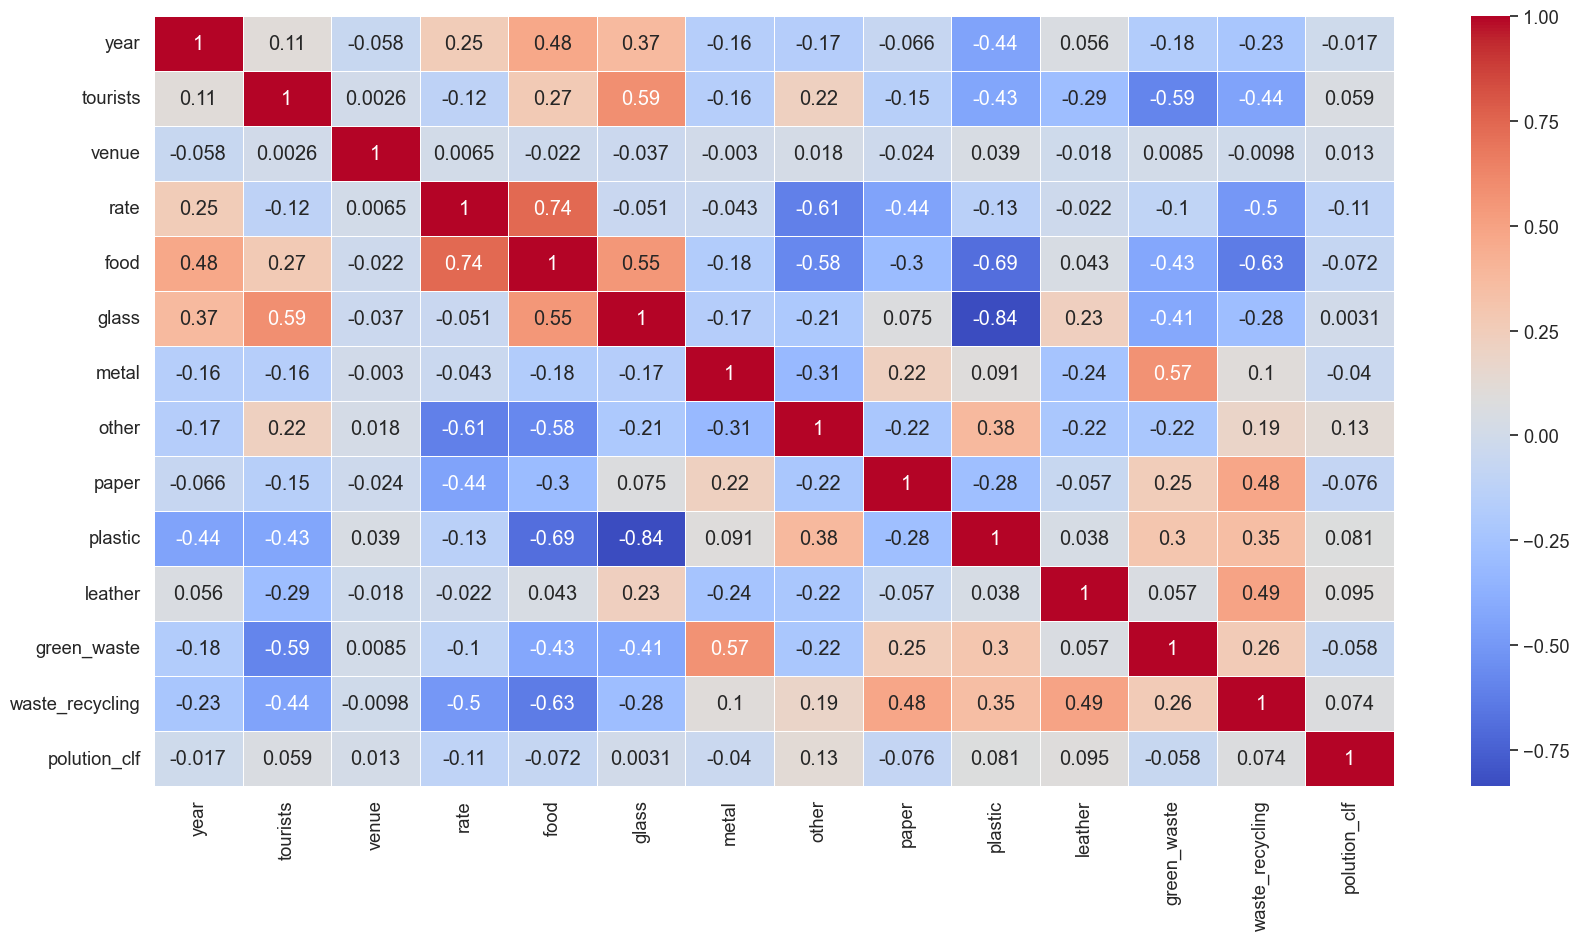

In [14]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

#### Видно, что таргет polution имеет больший коэффициент корреляции со следующими признаками:
other rate - возьмем эти столбцы

Удалим остальные столбцы

In [15]:
df = df.drop(columns = ["green_waste","metal","leather","glass","plastic", "venue", "year", "paper"], axis = 1)

In [16]:
df = df.drop("tourists", axis = 1)

In [17]:
df = df.drop("food", axis = 1)
df = df.drop("waste_recycling", axis = 1)

<Axes: >

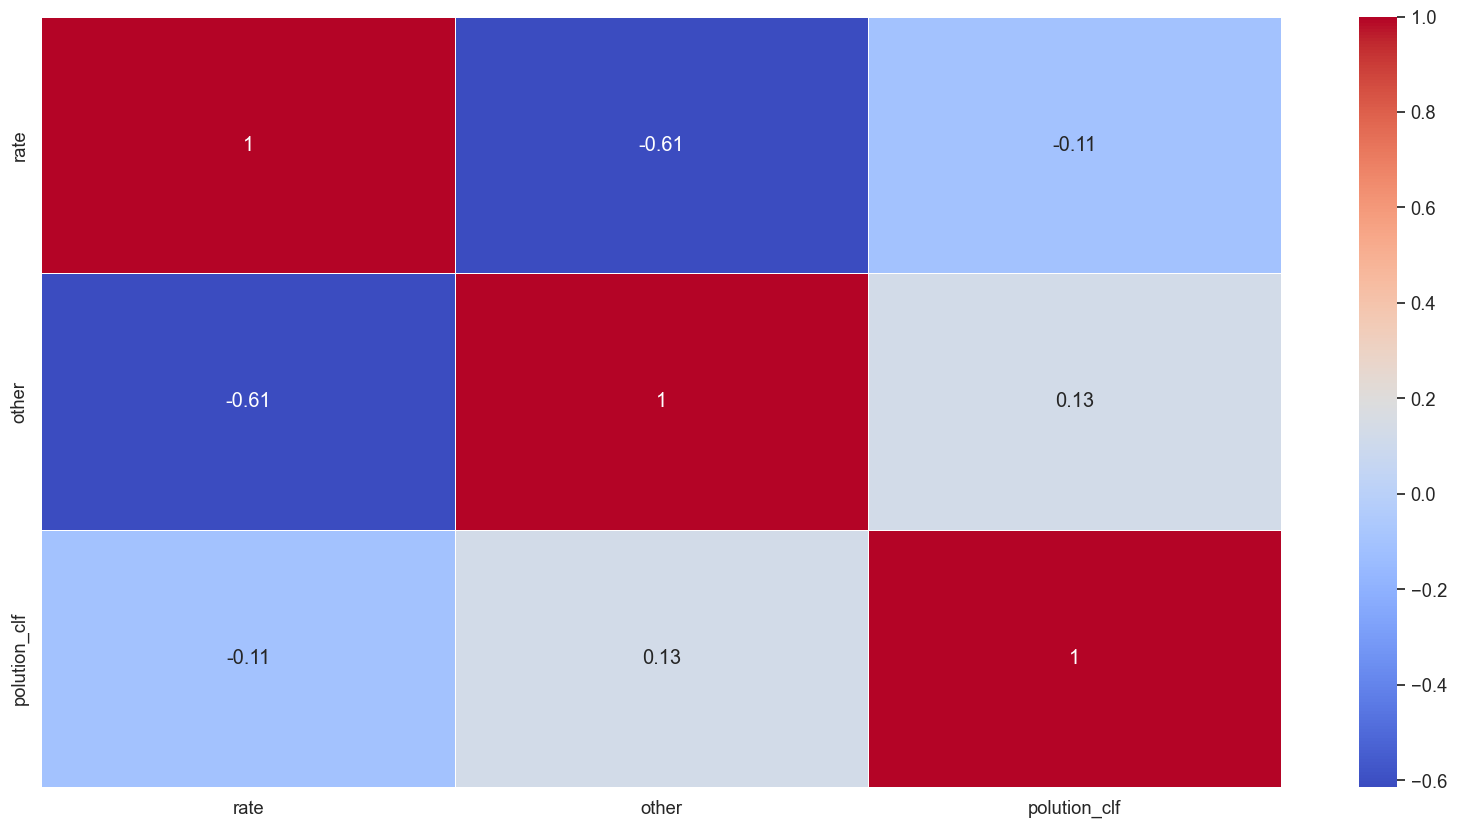

In [18]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

#### Рассмотрим связь признаков друг с другом и с таргетом

#### Связь other с таргетом

In [19]:
grid = sns.jointplot(df["polution_clf"], df["other"], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

#### Связь rate с таргетом

In [ ]:
grid = sns.jointplot(df["polution_clf"], df["rate"], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

Наблюдается слабая корреляция между этими признаками и таргетом, однако она есть

#### Связь other с rate

In [ ]:
grid = sns.jointplot(df["other"], df["rate"], kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

Видно, что между other и rate наблюдается сильная отрицательная корреляция

### Сделаем one hot encoding категориальных признаков

In [22]:
df.head(3)

,code,period,id,Country,rate,other,polution_clf
idx,,,,,,,
11,EEA_3161-03-3,2009-04--2009-10,FRGR0220,France,0.0,26.0,0.0
20,EEA_3161-05-5,2009-01--2009-12,FRDR179,France,0.0,26.0,0.0
27,EEA_3161-01-1,2009-01--2009-12,FRDR174,France,0.0,26.0,0.0


In [23]:
df.drop("polution_clf", axis=1, inplace=True)

In [24]:
df = pd.get_dummies(df, columns=["code", "id", "period", "Country"])

In [25]:
num_column = ["rate", "other"]

### MinMaxScaler для числовых признаков

In [26]:
def get_scale(df,col, model):
    
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [27]:
df = get_scale(df, num_column, MinMaxScaler())

In [33]:
X_train

array([[0.        , 0.59023837, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.59023837, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.59023837, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.31782066, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.59023837, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.31782066, 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Разбиваем обратно на тестовую и тренировочную выборки

In [28]:
train = df.iloc[0:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]

In [29]:
y_train = target['polution_clf'].values.ravel()

In [30]:
X_train = train.values
X_test = test.values

In [31]:
from sklearn.model_selection import train_test_split
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)

#### Воспользуемся логистической регрессией из sklearn

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(random_state=0).fit(X_train_, y_train_)

#### Качество модели на тренировочном и тестовом датасете

In [35]:
print(f'Test Score = {clf.score(X_val, y_val):.2f}, Train Score = {clf.score(X_train_, y_train_):.2f}')

Test Score = 0.80, Train Score = 0.87


На тестовой выборке происходит падение скора, применим регуляризацию

In [36]:
list1 = [9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5]
for c in list1:
    clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, tol=000.1, C=c)
    clf.fit(X_train_, y_train_)
    print(f'{c}:')
    print(f'Test Score = {clf.score(X_val, y_val):.5f}, Train Score = {clf.score(X_train_, y_train_):.5f}')
    print('-'*50)

9.6:
Test Score = 0.85495, Train Score = 0.98121
--------------------------------------------------
9.7:
Test Score = 0.85666, Train Score = 0.98121
--------------------------------------------------
9.8:
Test Score = 0.85666, Train Score = 0.98164
--------------------------------------------------
9.9:
Test Score = 0.85666, Train Score = 0.98164
--------------------------------------------------
10.0:
Test Score = 0.85666, Train Score = 0.98164
--------------------------------------------------
10.1:
Test Score = 0.85666, Train Score = 0.98164
--------------------------------------------------
10.2:
Test Score = 0.85495, Train Score = 0.98164
--------------------------------------------------
10.3:
Test Score = 0.84983, Train Score = 0.98164
--------------------------------------------------
10.4:
Test Score = 0.84983, Train Score = 0.98164
--------------------------------------------------
10.5:
Test Score = 0.84983, Train Score = 0.98164
---------------------------------------------

Вывод: наилучшее значение: 10.0

Обучим модель на всей тренировочной выборке

In [37]:
clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, tol=000.1, C=10.0).fit(X_train, y_train)

#### Сделаем предсказание и занесем его в submission

In [39]:
y_pred = clf.predict(X_test)

In [40]:
submission['polution_clf'] = y_pred

In [41]:
submission = submission.set_index('idx')

In [42]:
submission

,polution_clf
idx,
19,0
46,1
94,1
96,1
98,1
...,...
19780,1
19824,1
19856,0


In [43]:
submission.to_csv('My_Submission_no_all_K.csv',index=True)